<a href="https://colab.research.google.com/github/NaufalPratomo/PCVK_Ganjil_2025/blob/main/Modul10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

**Tugas 3: Global Thresholding Manual**

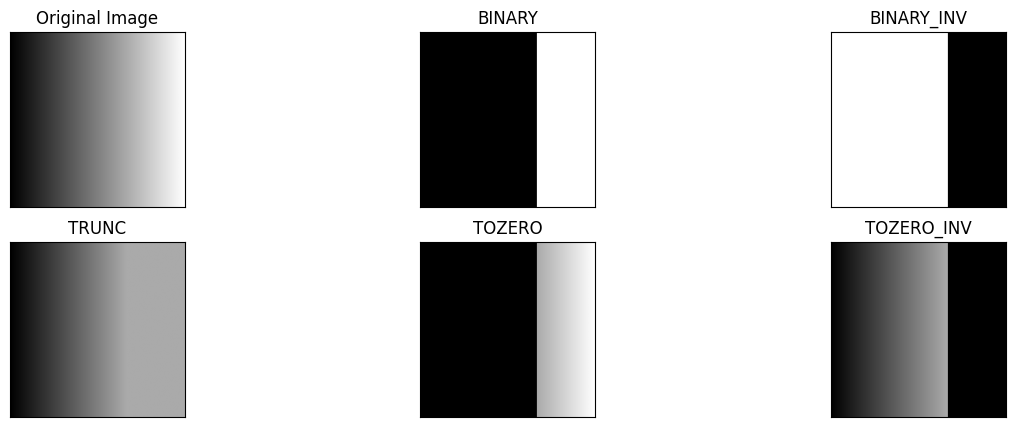

In [2]:
grad_img = np.zeros((256, 256), dtype=np.uint8)
grad_img[:] = np.arange(256)

# 2. Tentukan nilai threshold
thresh_val = 170
max_val = 255

# 3. Implementasi manual
# Buat salinan gambar asli
img = grad_img.copy()

# BINARY
binary_manual = np.zeros_like(img)
binary_manual[img > thresh_val] = max_val

# BINARY_INV
binary_inv_manual = np.zeros_like(img)
binary_inv_manual[img <= thresh_val] = max_val

# TRUNC
trunc_manual = img.copy()
trunc_manual[img > thresh_val] = thresh_val

# TOZERO
tozero_manual = img.copy()
tozero_manual[img <= thresh_val] = 0

# TOZERO_INV
tozero_inv_manual = img.copy()
tozero_inv_manual[img > thresh_val] = 0

# 4. Tampilkan hasil
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [grad_img, binary_manual, binary_inv_manual, trunc_manual, tozero_manual, tozero_inv_manual]

plt.figure(figsize=(15, 5))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

**Tugas 4: Otsu's Thresholding Manual**

In [3]:
img_balloon = cv2.imread('balloon.jpg', 0)

# --- Implementasi Otsu Manual ---
def manual_otsu(gray_img):
    # Hitung histogram
    hist = cv2.calcHist([gray_img], [0], None, [256], [0, 256])
    total_pixels = gray_img.shape[0] * gray_img.shape[1]

    # Normalisasi histogram untuk mendapatkan probabilitas
    p = hist / total_pixels

    max_variance = 0
    best_threshold = 0

    # Iterasi melalui semua kemungkinan threshold (t)
    for t in range(256):
        # Hitung w_b, mu_b (weight dan mean background)
        w_b = np.sum(p[:t])
        mu_b = np.sum(np.arange(t) * p[:t].T) / w_b if w_b > 0 else 0

        # Hitung w_f, mu_f (weight dan mean foreground)
        w_f = np.sum(p[t:])
        mu_f = np.sum(np.arange(t, 256) * p[t:].T) / w_f if w_f > 0 else 0

        # Hitung between-class variance
        variance_between = w_b * w_f * ((mu_b - mu_f) ** 2)

        if variance_between > max_variance:
            max_variance = variance_between
            best_threshold = t

    return best_threshold

# 2. Dapatkan nilai threshold dari Otsu manual
otsu_thresh_val = manual_otsu(img_balloon)

# 3. Terapkan thresholding
# Global thresholding biasa (v=90)
ret_global, global_thresh = cv2.threshold(img_balloon, 90, 255, cv2.THRESH_BINARY)
# Otsu's thresholding manual
ret_otsu, otsu_thresh = cv2.threshold(img_balloon, otsu_thresh_val, 255, cv2.THRESH_BINARY)

# 4. Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img_balloon, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 3, 2)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding (v = 90)')

plt.subplot(1, 3, 3)
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu's Thresholding (V = {otsu_thresh_val})")
plt.show()

AttributeError: 'NoneType' object has no attribute 'shape'

**Tugas 5: Histogram Foreground**

In [ ]:
img_tobacco = cv2.imread('tobacco.jpg')
img_rgb = cv2.cvtColor(img_tobacco, cv2.COLOR_BGR2RGB)

# 2. Buat mask untuk segmentasi
# Ubah ke grayscale untuk membuat mask
gray_tobacco = cv2.cvtColor(img_tobacco, cv2.COLOR_BGR2GRAY)
# Karena background putih, kita gunakan THRESH_BINARY_INV
ret, mask = cv2.threshold(gray_tobacco, 240, 255, cv2.THRESH_BINARY_INV)

# 3. Tampilkan citra asli dan citra segmentasi (mask)
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title('Citra Segment (Mask)')

# 4. Hitung dan tampilkan histogram keseluruhan
plt.subplot(2, 2, 3)
colors = ('r', 'g', 'b')
for i, col in enumerate(colors):
    hist_full = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist_full, color=col)
plt.title('Histogram dari keseluruhan citra')
plt.xlim([0, 256])

# 5. Hitung dan tampilkan histogram foreground saja (menggunakan mask)
plt.subplot(2, 2, 4)
for i, col in enumerate(colors):
    hist_masked = cv2.calcHist([img_rgb], [i], mask, [256], [0, 256])
    plt.plot(hist_masked, color=col)
plt.title('Histogram hanya pada FG objek saja')
plt.xlim([0, 256])

plt.show()

**Tugas 6: Segmentasi Warna dengan K-Means**

In [ ]:
img_peppers = cv2.imread('peppers.jpg')
img_peppers_rgb = cv2.cvtColor(img_peppers, cv2.COLOR_BGR2RGB)

# 2. Reshape gambar menjadi daftar piksel
pixel_values = img_peppers_rgb.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# 3. Jalankan K-Means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 5 # Coba dengan 5 cluster untuk memisahkan warna utama
compactness, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Konversi centers (centroid) ke format uint8
centers = np.uint8(centers)

# 4. Identifikasi cluster warna kuning
# Warna kuning memiliki nilai R dan G tinggi, B rendah
yellow_cluster_index = np.argmin(centers[:, 2]) # Asumsi cluster dengan nilai Biru (indeks 2) terendah

# 5. Buat gambar baru, tampilkan hanya cluster kuning
masked_image = np.copy(pixel_values)
# Ubah semua piksel yang BUKAN bagian dari cluster kuning menjadi putih
masked_image[labels.flatten() != yellow_cluster_index] = [255, 255, 255]

# Reshape kembali ke bentuk gambar asli
masked_image = masked_image.reshape(img_peppers_rgb.shape)

# 6. Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_peppers_rgb)
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(masked_image)
plt.title('Hanya Warna Kuning')
plt.show()

**Tugas 7: Thresholding Terbaik untuk "crossword.jpg"**

In [ ]:
# 1. Baca gambar
img_crossword = cv2.imread('crossword.jpg', 0)

# 2. Terapkan Adaptive Thresholding
# cv.ADAPTIVE_THRESH_GAUSSIAN_C seringkali memberikan hasil yang lebih halus
# Block Size dan C adalah parameter yang bisa di-tuning
# Block size harus ganjil
best_thresh = cv2.adaptiveThreshold(
    img_crossword,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    15, # Block size
    5   # Constant C
)

# 3. Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_crossword, cmap='gray')
plt.title('Citra Asli Crossword')

plt.subplot(1, 2, 2)
plt.imshow(best_thresh, cmap='gray')
plt.title('Hasil Adaptive Thresholding')
plt.show()